### Adam Thomson - PHY572 - Assignment Week 6

#### 1. Reproduce the circuits shown here in Qiskit and interpret.
Bell States Qiskit https://github.com/asgunzi/Bell-and-GHZ 

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

sampler = SamplerV2()

In [2]:
# Setup a Bell State QC
qcBell = QuantumCircuit(2)
qcBell.h(0)
qcBell.cx(0,1)
qcBell.measure_all()
qcBell.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

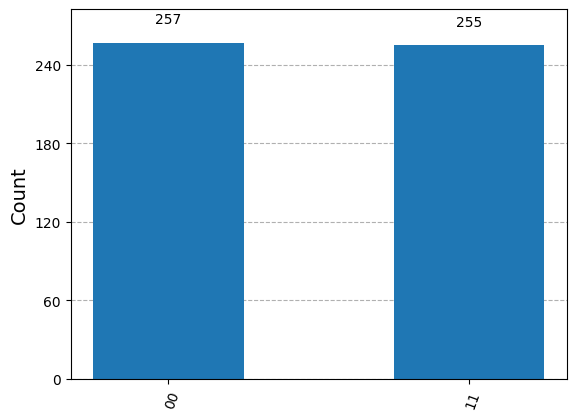

In [3]:
bell_result = sampler.run([qcBell], shots=512).result()
plot_histogram(bell_result[0].data.meas.get_counts())

Results match the expectation, only |00> and |11> measured.

In [4]:
qcGHZ = QuantumCircuit(3)
qcGHZ.h(0)
qcGHZ.cx(0,1)
qcGHZ.cx(1,2)
qcGHZ.measure_all()
qcGHZ.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

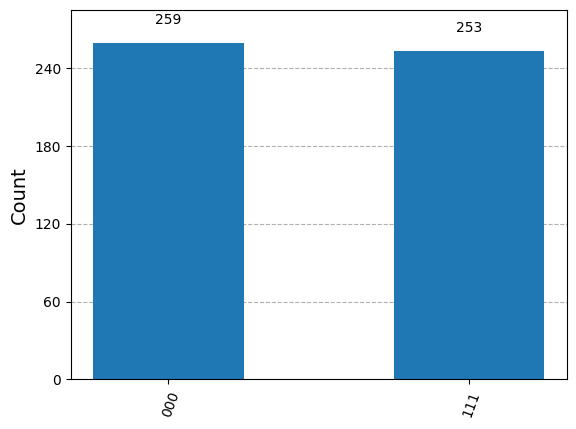

In [5]:
ghz_result = sampler.run([qcGHZ], shots=512).result()
plot_histogram(ghz_result[0].data.meas.get_counts())

Measurements match expectations, only |000> and |111> observed.

In [7]:
qc4 = QuantumCircuit(4)
qc4.h(0)
qc4.cx(0,1)
qc4.cx(1,2)
qc4.cx(2,3)
qc4.measure_all()
qc4.draw()

┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3

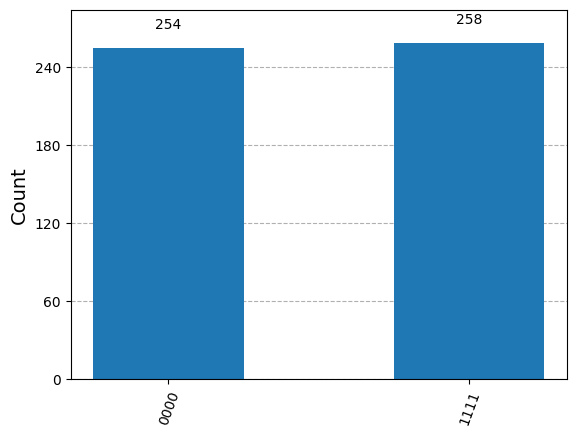

In [8]:
qc4_result = sampler.run([qc4], shots=512).result()
plot_histogram(qc4_result[0].data.meas.get_counts())

Measurements match expectations, all observations are |0000> or |1111>

In [9]:
n = 6
qcN = QuantumCircuit(n)
qcN.h(0)
for i in range(n-1):
  qcN.cx(i, i+1)
qcN.measure_all()
qcN.draw()

┌───┐                          ░ ┌─┐               
   q_0: ┤ H ├──■───────────────────────░─┤M├───────────────
        └───┘┌─┴─┐                     ░ └╥┘┌─┐            
   q_1: ─────┤ X ├──■──────────────────░──╫─┤M├────────────
             └───┘┌─┴─┐                ░  ║ └╥┘┌─┐         
   q_2: ──────────┤ X ├──■─────────────░──╫──╫─┤M├─────────
                  └───┘┌─┴─┐           ░  ║  ║ └╥┘┌─┐      
   q_3: ───────────────┤ X ├──■────────░──╫──╫──╫─┤M├──────
                       └───┘┌─┴─┐      ░  ║  ║  ║ └╥┘┌─┐   
   q_4: ────────────────────┤ X ├──■───░──╫──╫──╫──╫─┤M├───
                            └───┘┌─┴─┐ ░  ║  ║  ║  ║ └╥┘┌─┐
   q_5: ─────────────────────────┤ X ├─░──╫──╫──╫──╫──╫─┤M├
                                 └───┘ ░  ║  ║  ║  ║  ║ └╥┘
meas: 6/══════════════════════════════════╩══╩══╩══╩══╩══╩═
                                          0  1  2  3  4  5

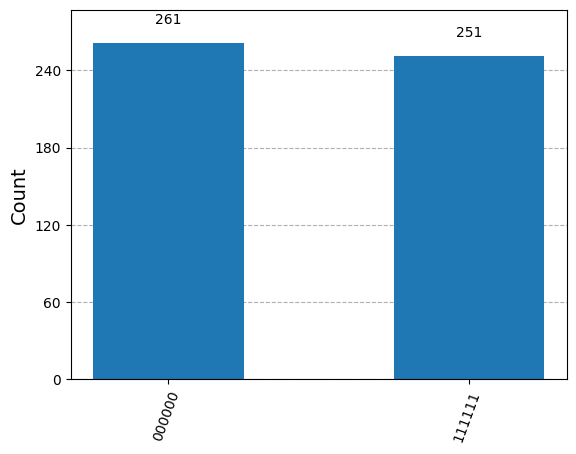

In [14]:
qcN_result = sampler.run([qcN], shots=512).result()
plot_histogram(qcN_result[0].data.meas.get_counts())

Observations continue to match expectations, all observations are |0..0> and |1..1>

We can deduce that any number of qubits can be strongly entangled simply by chaining together enough Controlled-NOT gates after a single Hadamard gate.

### 2. [Submitted as PDF]

### 3a. Follow the instructions to create a Bell State. Creating the |Ψ+> state

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

### b. Show that HZH = X using qiskit and via matrix

In [17]:
qcHZH = QuantumCircuit(1)
qcX = QuantumCircuit(1)

qcHZH.h(0)
qcHZH.z(0)
qcHZH.h(0)
qcHZH.measure_all()

qcX.x(0)
qcX.measure_all()

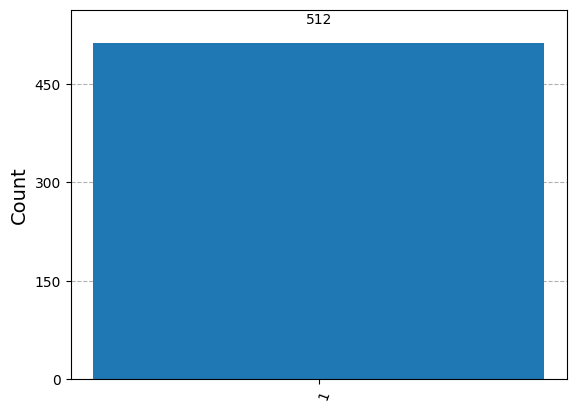

In [18]:
qcHZH_result = sampler.run([qcHZH], shots=512).result()
plot_histogram(qcHZH_result[0].data.meas.get_counts())

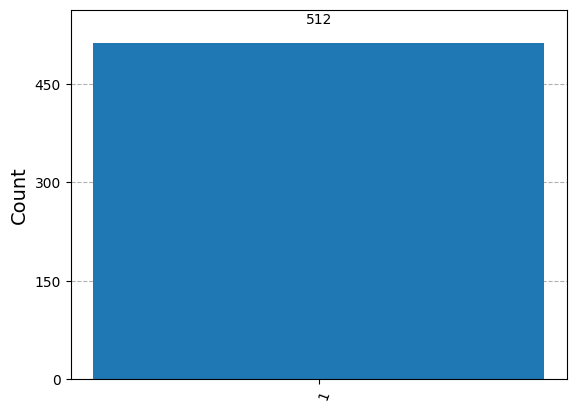

In [19]:
qcX_result = sampler.run([qcX], shots=512).result()
plot_histogram(qcX_result[0].data.meas.get_counts())

HZH and X both flip |0> to |1>

In [24]:
import numpy
qubit0 = numpy.array((1,0))
qubit1 = numpy.array((0,1))

z_gate = numpy.array(((1,0), (0,-1)))
x_gate = numpy.array(((0,1),(1,0)))

inv_root_2 = 2**(-0.5)
had_gate = numpy.array(((inv_root_2,inv_root_2),(inv_root_2, -1 * inv_root_2)))

In [26]:
h0 = numpy.dot(had_gate, qubit0)
zh0 = numpy.dot(z_gate, h0)
hzh0 = numpy.dot(had_gate, zh0)
print(hzh0)

[-4.26642159e-17  1.00000000e+00]


In [28]:
x0 = numpy.dot(x_gate, qubit0)
print(x0)

[0 1]


#### HZH|0> = |1> = X|0>

In [29]:
h1 = numpy.dot(had_gate, qubit1)
zh1 = numpy.dot(z_gate, h1)
hzh1 = numpy.dot(had_gate, zh1)
print(hzh1)

[ 1.00000000e+00 -4.26642159e-17]


In [ ]:
x1 = numpy.dot(x_gate, qubit1)
print(x1)

[1 0]


#### 